In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 本文主要通过梯度下降完成线性规划的问题

In [2]:
# 获取路径中的数据
path = 'data.txt'
data = pd.read_csv(path,header=None)
data1 = pd.read_csv(path,header=None)

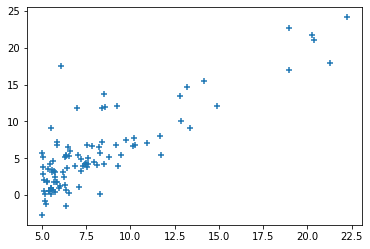

In [3]:
# 画出数据间的散点图像
plt.scatter(data1[:][0],data1[:][1],marker='+')
plt.show()

In [4]:
data = np.array(data)
# print(data)

In [5]:
m = data.shape[0]
# y = ax + b 中的参数 a 与 b的值初始化，梯度下降的目的是找到一组a，b的值使得损失函数最小
theta = [0,0]
# 给参数b系数设为1，方便计算，即y = x*a + 1*b
data = np.hstack([np.ones((m,1)),data])

In [6]:
y = data[: ,2] #取 事实中的y值
data = data[:, :2] #取 x的值与 1这个值
print(data[:,1])

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


In [7]:
# 定义损失函数
def cost_function(data, theta, y):
    cost = np.sum((data.dot(theta) - y ))**2
    return cost/(2*m)

In [8]:
# 定义梯度
def gradient(data, theta, y):
    grad = np.empty(len(theta))
    grad[0] = np.sum(data.dot(theta)-y)/(m)
    # for i in range(1,len(theta)):
    grad[1] = np.sum((data.dot(theta)-y)*data[:,1])/m
    #print(grad)
    return grad

In [9]:
# 定义用梯度下降进行迭代
X = np.arange(3,25)
step = 0.0001
for i in range(1000):
    last_theta = theta
    grad = gradient(data,theta,y)
    theta = theta - step*grad
    print(abs(cost_function(data, last_theta, y) - cost_function(data, theta, y)))

30.382767589974037
29.854644602672124
29.335422535224552
28.82495354137177
28.32309221324749
27.829695541302726
27.344622874892593
26.867735883500245
26.398898518610622
25.937976976188565
25.484839659801537
25.039357144316
24.601402140217488
24.170849458494104
23.74757597611142
23.3314606020449
22.922384243873694
22.520229774922882
22.124882001941614
21.736227633314456
21.354155247795006
20.978555263749286
20.609319908906173
20.246343190604648
19.88952086652921
19.5387504159213
19.19393101127139
18.85496349046707
18.52175032940511
18.194195615048216
17.87220501892648
17.555685771072945
17.24454663438769
16.93869787942083
16.63805125957174
16.34251998669629
16.052018707105958
15.766463477976117
15.485771744127192
15.20986231519214
14.938655343164783
14.672072300305558
14.410035957417108
14.152470362478766
13.899300819621885
13.650453868460204
13.40585726375673
13.165439955420197
12.929132068835884
12.696864885517243
12.468570824071321
12.244183421484081
12.02363731470598
11.806868222546

[0.00868908 0.80057917]


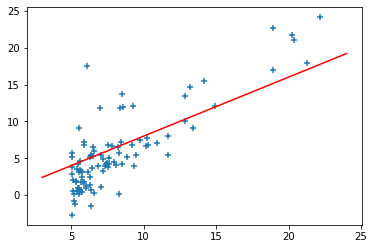

In [10]:
Y = theta[0] + theta[1]*X
print(theta)       
plt.plot(X,Y,color='r')
plt.scatter(data1[:][0],data1[:][1],marker='+')
plt.show()